# A/B Experiments on Online Advertisement 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': visitor age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

**Age Distribution**

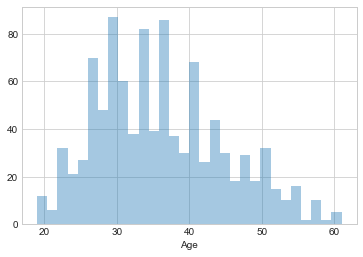

In [5]:
sns.set_style('whitegrid')
%matplotlib inline
sns.distplot(ad_data['Age'], hist=True, kde=False, bins=30)

It appears that many visitors are in their mid 20s, 30s, and 40s.

**Area Income vs. Age**

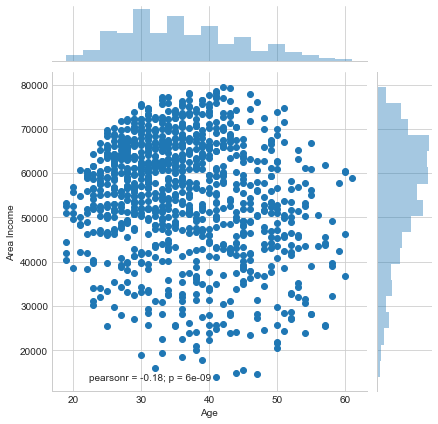

In [6]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

This plot shows that visitors between the age of 20 and 40 make more money with the area income between 50000 and 80000.

**KDE Distribution of Daily Time Spent on Site vs. Age**

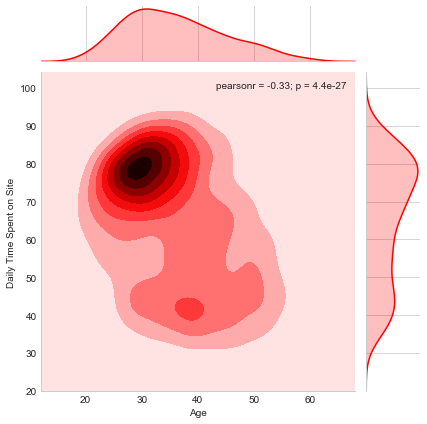

In [7]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='r')

Here we see that visitors in their mid-20s until 40s spend between 65 to 85 minutes on site, making them the age group with the longest time spent on site. 

**Daily Time Spent on Site vs. Daily Internet Usage**

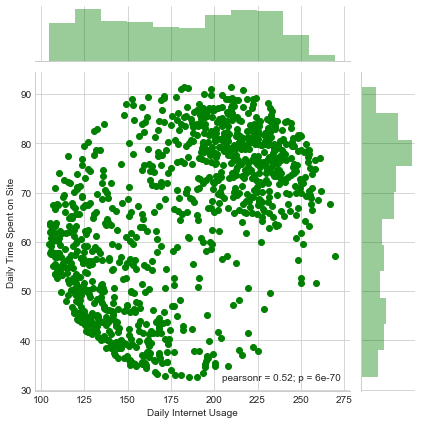

In [8]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=ad_data, color='g')

Here we see two clusters. The first one shows that visitors with daily internet usage between 100 to 175 minutes spend about 30 to 65 minutes on site. The second cluster shows that visitors with daily internet usage of 200 to 250 minutes spend 65 to 90 minutes on site.

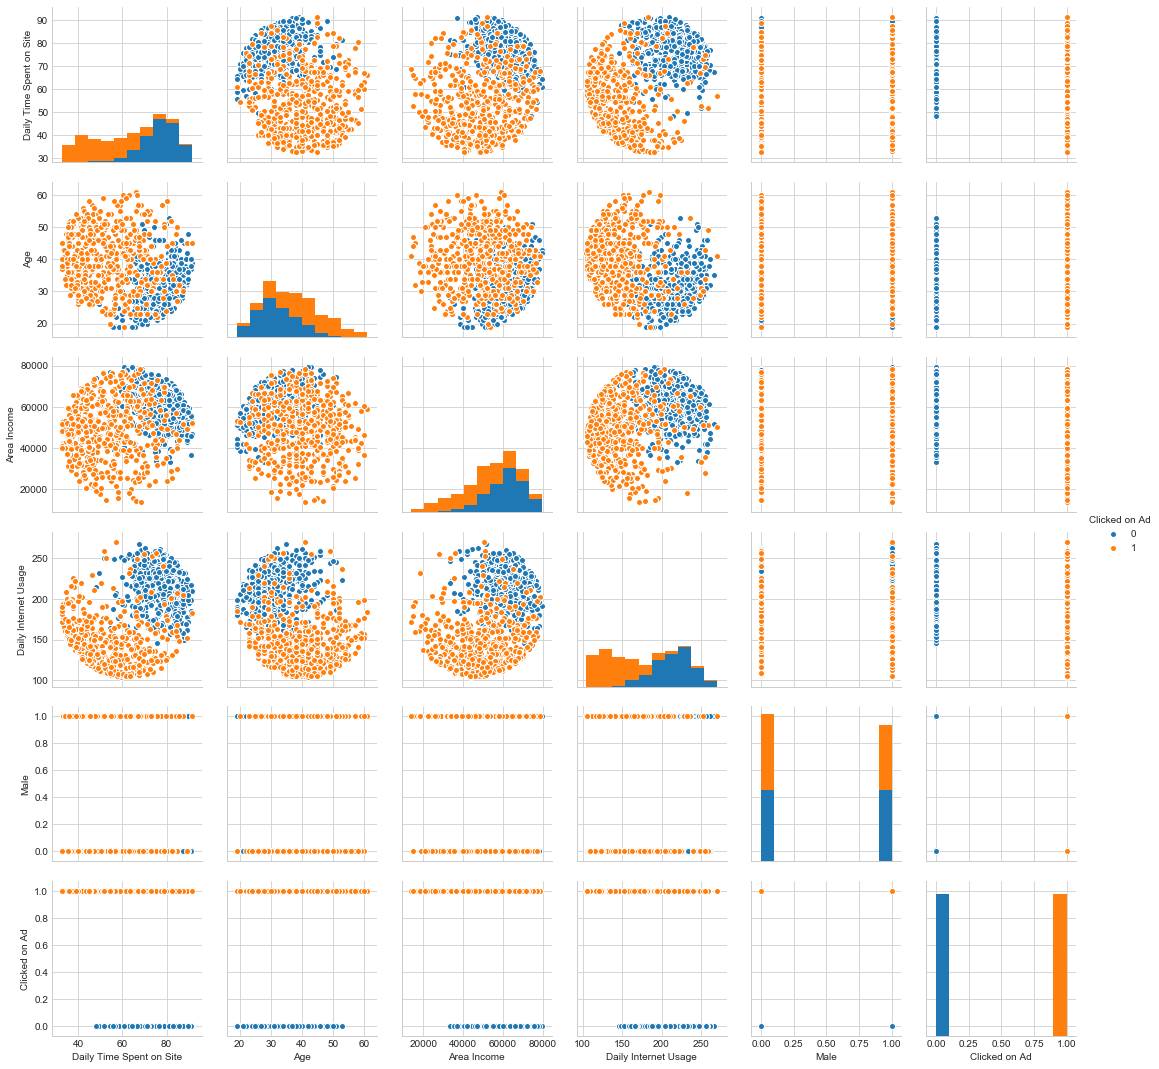

In [9]:
sns.pairplot(data=ad_data, hue='Clicked on Ad')

Take a look at the first row, fourth column plot (Daily Time Spent on Site vs. Daily Internet Usage), which shows two clusters as seen in previous jointplot. Here we clearly see that the two clusters are well separated between those who clicked on the ad and those who did not. The first cluster from the left are the visitors who ended up clicking the ad.

**Boxplot Area Income vs. Clicked on Ad**

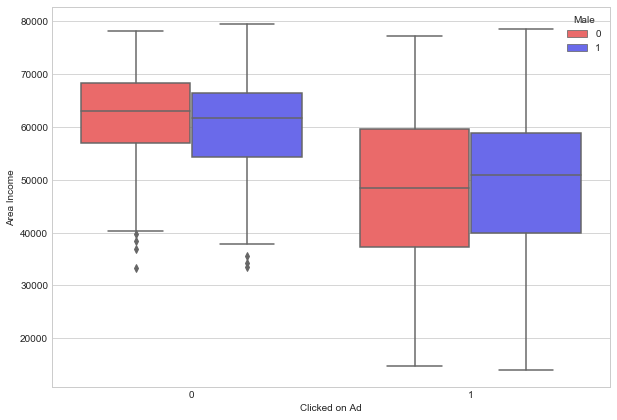

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Clicked on Ad', y='Area Income', data=ad_data, hue='Male', palette='seismic_r')

It seems that those who clicked on ad have lower area income with the average of 50000, compared to those who did not click on ad. Female and male area income spread is about the same for both groups.

**Boxplot Age vs. Clicked on Ad**

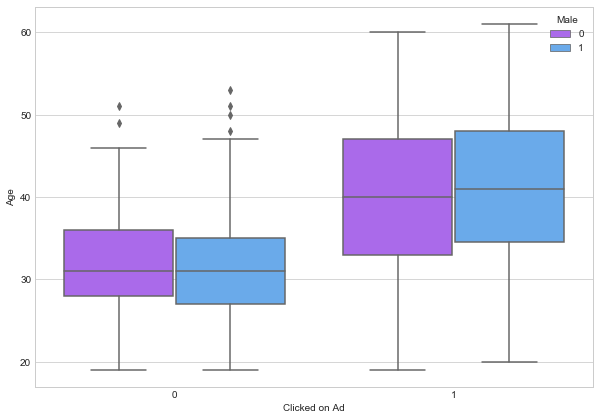

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Clicked on Ad', y='Age', data=ad_data, hue='Male', palette='cool_r')

We see quite a clear age difference between those who clicked the ad and those who did not, although gender seems to play no role. The plot shows that visitors that clicked on ad have an average age of 40.

**Combining the information we gained from the previous boxplot, we see that visitors who clicked on ad have the average age of 40 and average income of 50000.**

## Check for Missing Values

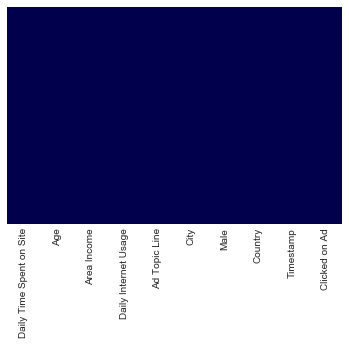

In [12]:
sns.heatmap(ad_data.isnull(), yticklabels=False, cbar=False, cmap='seismic')

We have no missing values. 

**Correlation Matrix**

In [13]:
ad_data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


There seems to be -0.748 correlation between 'Clicked on Ad' and 'Daily Time Spent on Site' and -0.787 correlation between 'Clicked on Ad' and 'Daily Internet Usage'. It means that those who clicked on ad spend less time on site and less time on the internet. 

The only positive correlation is 0.47, between 'Age' and 'Clicked on Ad'. This shows that there is a somewhat strong correlation that as the visitors age increase, the more likely they are to click on ad.

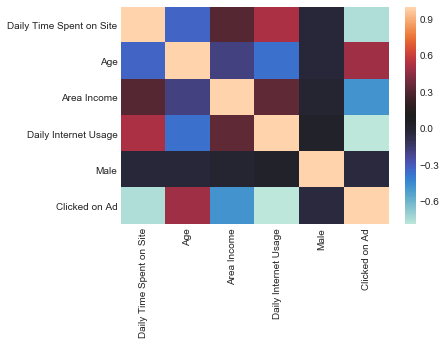

In [14]:
sns.heatmap(ad_data.corr(), cmap='icefire')

The strongest correlations to 'Clicked on Ad' are negative, with 'Daily Time Spent on Site' and 'Daily Internet Usage', followed by 'Area Income'. Gender has no correlation at all, while 'Age' shows mild positive correlation. 

## Developing Models

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [16]:
X = ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)
y = ad_data['Clicked on Ad']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77)

We are using four algorithms; one linear and three non-linear algorithms.
<break>
**Linear algorithms**: Logistic Regression (LR)
<break>
**Non-linear algorithms**: Support Vector Machines (SVM), Gaussian Naive Bayes (NB), and k-Nearest Neighbors (KNN)

In [18]:
models = [ ('LR', LogisticRegression()),\
           ('KNN', KNeighborsClassifier()),\
           ('NB', GaussianNB()),\
           ('SVM', SVC())
         ]

In [19]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=77)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f mean, %f std" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.898667 mean, 0.041825 std
KNN: 0.706667 mean, 0.047329 std
NB: 0.989333 mean, 0.013064 std
SVM: 0.489333 mean, 0.038667 std


These values are the mean accuracy, and so to get a better picture, we are plotting the results in boxplots.

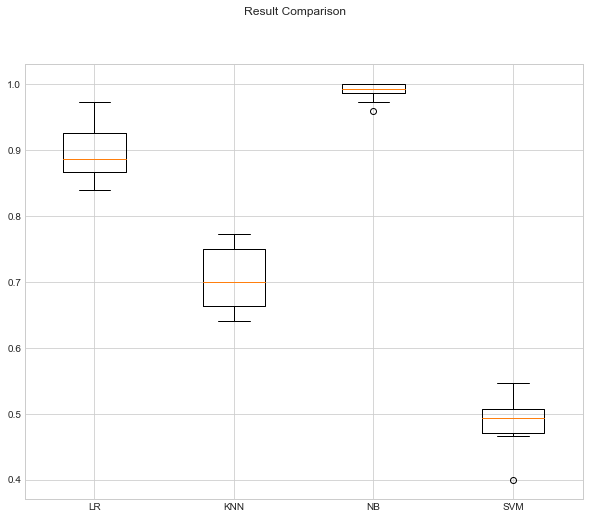

In [20]:
fig = plt.figure(figsize=(10,8))
fig.suptitle('Result Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

It looks like NB has performs the best with over 98% accuracy.

## Finalizing Model

In [21]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [22]:
predictions = model_nb.predict(X_test)

In [23]:
print(accuracy_score(y_test, predictions))

0.988


In [24]:
print(confusion_matrix(y_test, predictions))

[[131   1]
 [  2 116]]


In [25]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       132
          1       0.99      0.98      0.99       118

avg / total       0.99      0.99      0.99       250



**NB achieves a 99% precision, recall, and f-1 scores, and 98.8% accuracy.**